# Exploration of the GZ dataset

### Goal
In this notebook, we are interested in counting the number of user messages and words in each conversation.

### Results
* On average, there is 1.6 message per conversation.
* On average, there are 22 words per conversation, but the variance is high.

In [1]:
import os
import pandas as pd
import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random
from multiprocessing import Pool

### Load dataset

In [2]:
dirname = "/home/michael/Workspace/datasets/galaxy_zoo/"
filename = "GZ_talk_comments_notes_urls_AISSAI.csv"

path = os.path.join(dirname, filename)
print('Does dataset path exist ?', os.path.exists(path))

Does dataset path exist ? True


In [21]:
data = pd.read_csv(path)
print('Number of lines:', len(data))
data.head()

Number of lines: 159704


,locations,subject_id,subject_set_id,board_id,board_title,board_description,discussion_title,comment_id,comment_body
0,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215478.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215478,876591,The zoom scale of this image is incorrect. I a...
1,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215746.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215746,894378,this seems to have a lens effect
2,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215478.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215478,894381,Agree with @user on scale difference. Answered...
3,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215566.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215566,894401,Looks like two galaxies merging
4,"{""0"":""https://panoptes-uploads.zooniverse.org/...",16215897.0,17452.0,1267,Notes,General comment threads about individual subjects,Subject 16215897,894403,appears to have 3 obvious bright objects lined...


### Group the conversations together

Conversations can be discriminated using their 'subject_id'.

In [7]:
grouped_data = data.groupby('subject_id')
print('Number of conversations:', len(grouped_data))

Number of conversations: 99591


### Plot histograms of #messages and #characters

In [26]:
# Let's see an example

discussion_id, group = next(iter(grouped_data))  # 'group' contains all the information regarding the conversation identified with 'discussion_id'
conversation = group['comment_body']  # the actual conversation is stored in the 'comment_body'

for i, message in enumerate(conversation):
    print(i, message, '\n')

0 What is that red object? Star, galaxy, optical effect or other?  

1 Hi TiborAcs and welcome to the Zoo,

The red object is a foreground star from our galaxy and so is the whitish object at 5 o'clock.
Hope this helps and happy hunting !  

2 #over-lap by #local-star, 

3 Thanks! Beautiful ÃÂ°ÃÂÃÂÃÂ 

4 I thought this looked like an elliptical, but it's very blue. It must be starforming so perhaps it's a spiral after all? Or a blue elliptical? 



In [18]:
n_messages = []
n_characters = []

for discussion_id, group in grouped_data:
    conversation = group['comment_body']
    n_messages.append(len(conversation))
    group_list = conversation.tolist()

    # Clean the conversation: if the current message is a 'nan', remove it
    for sentence in group_list:
        if isinstance(sentence, float):
            if np.isnan(sentence):
                group_list.remove(sentence)

    n_characters.append(sum(len(sentence.split()) for sentence in group_list))
    
n_messages = np.array(n_messages)
n_characters = np.array(n_characters)

In [19]:
print('Mean number of messages per conversation:', n_messages.mean())
print('Mean number of characters per conversation:', n_characters.mean())

Mean number of messages per conversation: 1.6030263778855518
Mean number of characters per conversation: 22.264752839111967


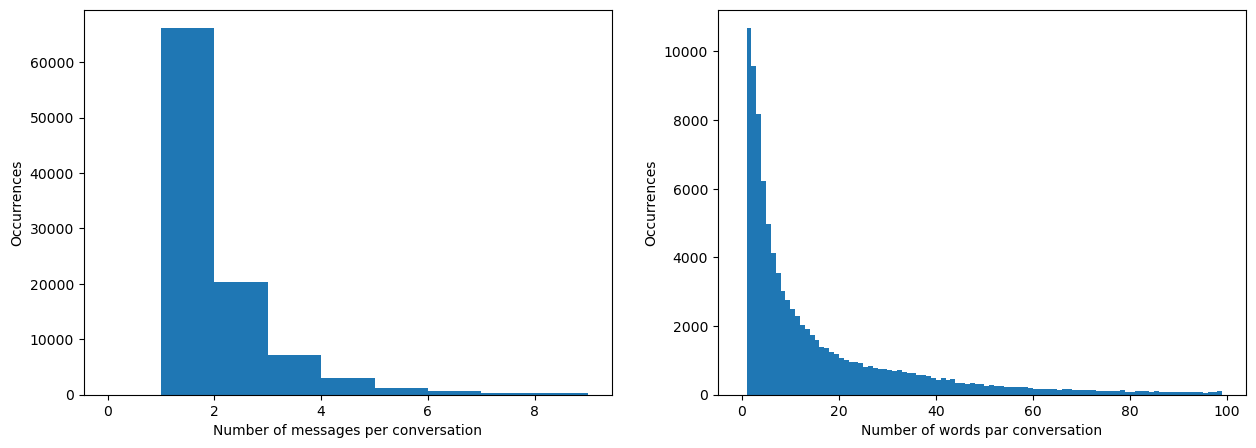

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(n_messages, bins=np.arange(10));
plt.xlabel('Number of messages per conversation')
plt.ylabel('Occurrences')
plt.subplot(1, 2, 2)
plt.hist(n_characters, bins=np.arange(100));
plt.xlabel('Number of words par conversation')
plt.ylabel('Occurrences')
# plt.savefig("/home/michael/Downloads/hists.png")